In [34]:
from google.colab import drive

# This will prompt you to authorize Colab to access your Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [29]:
### STIMULUS CREATION (DONT RUN THIS AGAIN)


from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

drive.mount('/content/drive')
#### DRIVE_PATH = Path('/content/drive/My Drive/files_for_project/stimuli')

# 32 stimulis
x_labels = [
    # Narrow (8)
    "Category (Narrow)", "Category (Narrow)",
    "Time (days)",       "Time (days)",
    "Height (cm)",       "Height (cm)",
    "Score",             "Score",
    # Moderate (8)
    "Product Type",      "Product Type",
    "Year",              "Year",
    "Temperature (°C)",  "Temperature (°C)",
    "Response Time (ms)","Response Time (ms)",
    # Wide (8)
    "Region",            "Region",
    "Month",             "Month",
    "Age",               "Age",
    "Price ($)",         "Price ($)",
    # Uniform (8)
    "Session",           "Session",
    "Distance (m)",      "Distance (m)",
    "Speed (km/h)",      "Speed (km/h)",
    "Rating",            "Rating",
    "Rating",            "Rating"
]

y_labels = [
    # Narrow (8)
    "Value",             "Value",
    "Measurement",       "Measurement",
    "Weight (kg)",       "Weight (kg)",
    "Frequency",         "Frequency",
    # Moderate (8)
    "Sales",             "Sales",
    "Revenue (M$)",      "Revenue (M$)",
    "Ice Cream Sales",   "Ice Cream Sales",
    "Count",             "Count",
    # Wide (8)
    "Population (k)",    "Population (k)",
    "Rainfall (mm)",     "Rainfall (mm)",
    "Income ($k)",       "Income ($k)",
    "Number of Items",   "Number of Items",
    # Uniform (8)
    "Attempts",          "Attempts",
    "Errors",            "Errors",
    "Completion Time (s)","Completion Time (s)",
    "Completion Time (s)","Completion Time (s)"
]

dist_labels = ["Narrow", "Moderate", "Wide", "Uniform"]

def sample_data(ds_id, size):
  ### data distribution
    if ds_id == 0:
        data = np.random.normal(50, 5, size)
    elif ds_id == 1:
        data = np.random.normal(50, 15, size)
    elif ds_id == 2:
        data = np.random.normal(50, 30, size)
    else:
        data = np.random.uniform(0, 100, size)
    return np.clip(data, 0, None)

plot_index = 0

## visualization creation

for ds_id in range(4):
    for viz in ['bar','line','scatter','histogram']:
        for polarity in ['positive','negative']:
            bg = '#F4F4F4' if polarity=='positive' else '#262626'
            fg = '#002D9C' if polarity=='positive' else '#4589FF'
            text_color = 'black' if polarity=='positive' else 'white'

            fig, ax = plt.subplots(figsize=(4,3), facecolor=bg)
            ax.set_facecolor(bg)
            for spine in ax.spines.values(): spine.set_color(text_color)
            ax.tick_params(colors=text_color)

            ax.set_title(f"{viz.capitalize()}", color=text_color)
            ax.set_xlabel(x_labels[plot_index], color=text_color)
            ax.set_ylabel(y_labels[plot_index], color=text_color)

            if viz=='bar':
                cats = [f"C{i}" for i in range(1,11)]
                ax.bar(cats, sample_data(ds_id,10), color=fg)
            elif viz=='line':
                ax.plot(np.arange(1,11), sample_data(ds_id,10), color=fg)
            elif viz=='scatter':
                ax.scatter(sample_data(ds_id,10), sample_data(ds_id,10), color=fg)
            else:
                ax.hist(sample_data(ds_id,50), bins=6, facecolor=fg, edgecolor=text_color, linewidth=1.5)

            out = DRIVE_PATH / f"{viz}_{polarity}_ds{ds_id}.png"
            out.parent.mkdir(parents=True, exist_ok=True)
            fig.savefig(out, facecolor=bg, bbox_inches='tight')
            plt.close(fig)

            plot_index += 1

print("32 labeled stimuli saved to:", DRIVE_PATH)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
32 labeled stimuli saved to: /content/drive/My Drive/data_files/stimuli


In [30]:
### METADATA OF VISUALIZATION CSV (DONT RUN THIS AGAIN)

from google.colab import drive
import pandas as pd
from pathlib import Path


drive.mount('/content/drive')
BASE_PATH = Path('/content/drive/My Drive/files_for_project')
META_PATH = BASE_PATH / 'metadata.csv'
BASE_PATH.mkdir(parents=True, exist_ok=True)

# Distribution and polarity lists
viz_types   = ["bar", "histogram", "line", "scatter"]
polarities  = ["negative", "positive"]


# Build metadata CSV for later
rows = []
plot_index = 0
for viz in viz_types:
    for polarity in polarities:
        for ds_id, dist in enumerate(dist_labels):
            rows.append({
                "plot_index":   plot_index,
                "filename":     f"{viz}_{polarity}_ds{ds_id}.png",
                "viz_type":     viz,
                "polarity":     polarity,
                "distribution": dist,
                "x_label":      x_labels[plot_index],
                "y_label":      y_labels[plot_index]
            })
            plot_index += 1

# Save CSV
df_meta = pd.DataFrame(rows)
df_meta.to_csv(META_PATH, index=False)
print("metadata.csv saved to:", META_PATH)
df_meta.head(8)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
metadata.csv saved to: /content/drive/My Drive/data_files/metadata.csv


,plot_index,filename,viz_type,polarity,distribution,x_label,y_label
0,0,bar_negative_ds0.png,bar,negative,Narrow,Category (Narrow),Value
1,1,bar_negative_ds1.png,bar,negative,Moderate,Category (Narrow),Value
2,2,bar_negative_ds2.png,bar,negative,Wide,Time (days),Measurement
3,3,bar_negative_ds3.png,bar,negative,Uniform,Time (days),Measurement
4,4,bar_positive_ds0.png,bar,positive,Narrow,Height (cm),Weight (kg)
5,5,bar_positive_ds1.png,bar,positive,Moderate,Height (cm),Weight (kg)
6,6,bar_positive_ds2.png,bar,positive,Wide,Score,Frequency
7,7,bar_positive_ds3.png,bar,positive,Uniform,Score,Frequency


In [35]:
### PREPROCESS DATA AND AGGREGATE FOR LATER PROCESSING

import pandas as pd
from pathlib import Path
from google.colab import drive

# Paths
BASE      = Path('/content/drive/My Drive/files_for_project')
TRIAL_DIR = BASE / 'trial_data'
META      = BASE / 'metadata.csv'
KEY       = BASE / 'answers.csv'

# Load metadata & key
meta_df = pd.read_csv(META)
if meta_df['plot_index'].min() == 0:
    meta_df['plot_index'] += 1

print(KEY)
key_df = pd.read_csv(KEY)

# Read and normalize participant files
parts = []
for pfile in sorted(TRIAL_DIR.glob('p*.csv')):
    dfp = pd.read_csv(pfile)
    # Normalize response columns
    if 'clusters_ans' in dfp.columns:
        dfp = dfp.rename(columns={
            'clusters_ans': 'clusters_key',
            'distribution_ans': 'distribution_key'
        })
    # Now both cases have clusters_key & distribution_key
    dfp['clusters_key']     = dfp['clusters_key'].astype(str).str.strip()
    dfp['distribution_key'] = dfp['distribution_key'].astype(str).str.strip()
    parts.append(dfp)

df = pd.concat(parts, ignore_index=True)

# Merge metadata
df = df.merge(meta_df, left_on='trial', right_on='plot_index', how='left')

# Merge correct-answer key
df = df.merge(key_df, on='trial', how='left')

# Compute accuracy flags
df['acc_clusters']     = (df['clusters_key']     == df['clusters_ans']).astype(int)
df['acc_distribution'] = (df['distribution_key'] == df['distribution_ans']).astype(int)


# Final check
print(f"Rows loaded: {len(df)}  Participants: {df['participant'].nunique()}")
df.head()


/content/drive/My Drive/files_for_project/answers.csv
Rows loaded: 256  Participants: 8


,participant,trial,clusters_key,distribution_key,rt_s,plot_index,filename,viz_type,polarity,distribution,x_label,y_label,clusters_ans,distribution_ans,acc_clusters,acc_distribution
0,1,1,D,A,45,1,bar_negative_ds0.png,bar,negative,Narrow,Category (Narrow),Value,D,A,1,1
1,1,2,B,B,50,2,bar_negative_ds1.png,bar,negative,Moderate,Category (Narrow),Value,B,B,1,1
2,1,3,C,C,60,3,bar_negative_ds2.png,bar,negative,Wide,Product Type,Sales,D,C,0,1
3,1,4,C,D,55,4,bar_negative_ds3.png,bar,negative,Uniform,Product Type,Sales,C,D,1,1
4,1,5,B,A,48,5,bar_positive_ds0.png,bar,positive,Narrow,Region,Population (k),B,A,1,1


In [36]:
# Count trials per participant
counts = df.groupby('participant')['trial'].count()
print(counts)


participant
1    32
2    32
3    32
4    32
5    32
6    32
7    32
8    32
Name: trial, dtype: int64


In [37]:
###### CALCULATE PERCENTAGE DIFFERENCES

import pandas as pd
import numpy as np

# 1. Single accuracy metric per trial
df['accuracy'] = df[['acc_clusters', 'acc_distribution']].mean(axis=1)

# 2. Per-participant mean accuracy and RT by polarity
metrics = (
    df
    .groupby(['participant', 'polarity'])
    .agg(
        mean_accuracy=('accuracy', 'mean'),
        mean_rt=('rt_s', 'mean')
    )
    .reset_index()
)

# 3. Pivot so each row is a participant, with separate columns for light vs dark
pivot = metrics.pivot(index='participant', columns='polarity').reset_index()

# 4. Safe percent‐difference calculations
# Accuracy
ma_pos = pivot[('mean_accuracy', 'positive')]
ma_neg = pivot[('mean_accuracy', 'negative')]
denom_acc = (ma_pos + ma_neg) / 2
pct_acc = np.where(
    denom_acc > 0,
    (ma_pos - ma_neg).abs() / denom_acc,
    0
)

# RT
rt_pos = pivot[('mean_rt', 'positive')]
rt_neg = pivot[('mean_rt', 'negative')]
denom_rt = (rt_pos + rt_neg) / 2
pct_rt = np.where(
    denom_rt > 0,
    (rt_pos - rt_neg).abs() / denom_rt,
    0
)

# 5. Assemble the percent‐differences DataFrame
pctdiffs = pd.DataFrame({
    'participant': pivot['participant'],
    'pctdiff_accuracy': pct_acc,
    'pctdiff_rt': pct_rt
})

# 6. Map age groups
pctdiffs['age_group'] = pctdiffs['participant'].apply(lambda x: 'YA' if x <= 4 else 'PLA')

# 7. Display results
print(pctdiffs)



   participant  pctdiff_accuracy  pctdiff_rt age_group
0            1          0.035088    0.018105        YA
1            2          0.000000    0.017277        YA
2            3          0.105263    0.185683        YA
3            4          0.000000    0.055141        YA
4            5          0.071429    0.036574       PLA
5            6          0.000000    0.044611       PLA
6            7          0.035088    0.049773       PLA
7            8          0.352941    0.019802       PLA


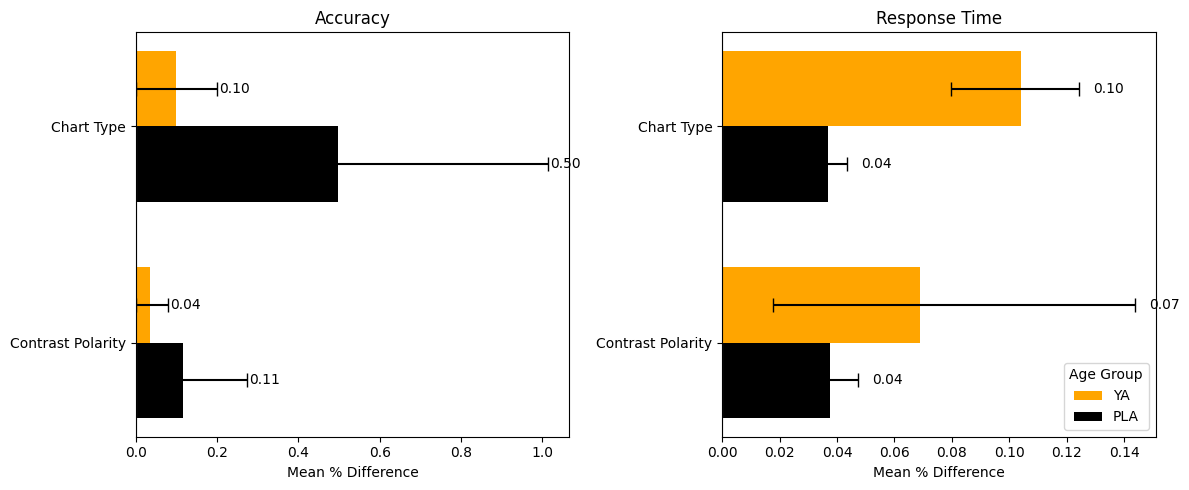

In [38]:
#### POLARITY AND CHARTS VIS 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# 1. Compute visualization‐type percent differences
viz_metrics = (
    df
    .groupby(['participant','viz_type'])
    .agg(acc_mean=('acc_clusters','mean'),
         rt_mean=('rt_s','mean'))
    .reset_index()
)
rows = []
for pid, grp in viz_metrics.groupby('participant'):
    age = 'YA' if pid <= 4 else 'PLA'
    acc = grp.set_index('viz_type')['acc_mean']
    rt  = grp.set_index('viz_type')['rt_mean']
    acc_diffs, rt_diffs = [], []
    for v1, v2 in combinations(acc.index, 2):
        denom = (acc[v1] + acc[v2]) / 2
        if denom > 0:
            acc_diffs.append(abs(acc[v1] - acc[v2]) / denom)
        denom2 = (rt[v1] + rt[v2]) / 2
        if denom2 > 0:
            rt_diffs.append(abs(rt[v1] - rt[v2]) / denom2)
    rows.append({
        'participant': pid,
        'age_group': age,
        'viz_pctdiff_acc': np.mean(acc_diffs) if acc_diffs else 0,
        'viz_pctdiff_rt':  np.mean(rt_diffs)  if rt_diffs  else 0
    })
viz_pd = pd.DataFrame(rows)

# 2. Merge with contrast polarity percent-differences
combined = pctdiffs.merge(viz_pd, on=['participant','age_group'])

# 3. Bootstrap utility
def boot_ci(arr, n=10000, alpha=0.05):
    boots = np.random.choice(arr, (n, len(arr)), replace=True)
    m = boots.mean(axis=1)
    lo, hi = np.percentile(m, [100*alpha/2, 100*(1-alpha/2)])
    return arr.mean(), lo, hi

# 4. Plot
categories = ['Contrast Polarity','Chart Type']
metrics_info = [
    ('pctdiff_accuracy','viz_pctdiff_acc','Accuracy'),
    ('pctdiff_rt','viz_pctdiff_rt','Response Time')
]
age_groups = ['YA','PLA']
colors = {'YA':'orange','PLA':'black'}

fig, axes = plt.subplots(1, 2, figsize=(12,5))

for ax, (c_col, v_col, title) in zip(axes, metrics_info):
    y = np.arange(len(categories))
    bar_h = 0.35

    # Plot YA first
    for ag, offset_sign in zip(age_groups, [+bar_h/2, -bar_h/2]):
        means, errs = [], []
        for cat in categories:
            arr = (combined[c_col] if cat=='Contrast Polarity' else combined[v_col])
            arr = arr[combined['age_group']==ag].values
            mean, lo, hi = boot_ci(arr)
            means.append(mean)
            errs.append((mean-lo, hi-mean))
        errs = np.array(errs).T
        ax.barh(
            y + offset_sign, means, bar_h,
            xerr=errs, capsize=5,
            color=colors[ag],
            label=ag
        )
        for yi, m in enumerate(means):
            ax.text(
                m + errs[1][yi] + 0.005,
                y[yi] + offset_sign,
                f"{m:.2f}", va='center'
            )

    ax.set_yticks(y)
    ax.set_yticklabels(categories)
    ax.set_xlabel('Mean % Difference')
    ax.set_title(title)
    ax.axvline(0, color='gray', linewidth=0.8)

# Legend on the second subplot, YA then PLA
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='Age Group', loc='lower right')

plt.tight_layout()
plt.show()


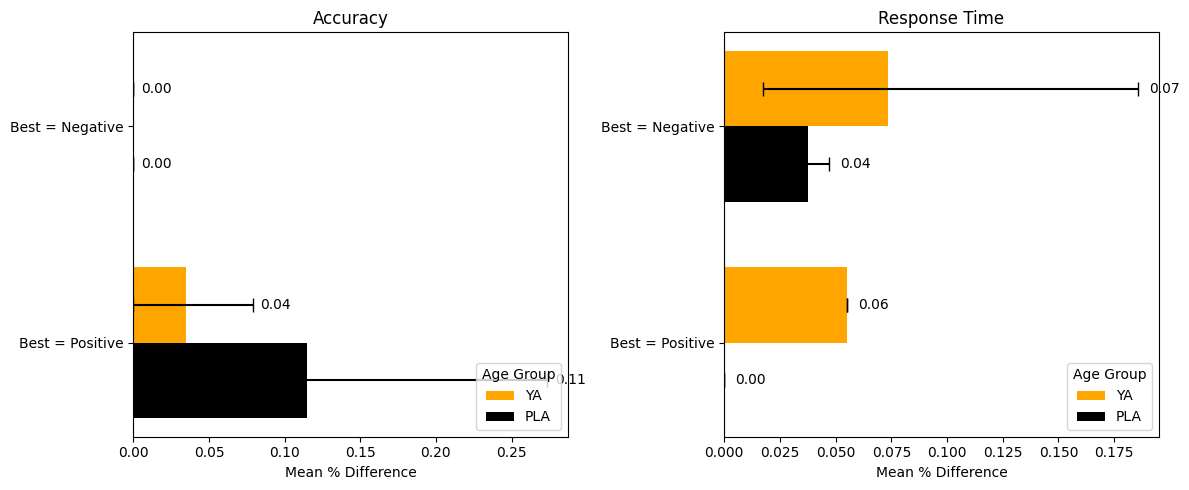

In [39]:
######## BEST POLARITY VIS 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We already have pctdiffs DataFrame with:
#   participant, pctdiff_accuracy, pctdiff_rt, age_group

# 1. Determine each participant’s better‐performing polarity per metric
#    If pctdiff is 0, we’ll exclude (equal performance)
better = []
for _, row in pctdiffs.iterrows():
    # For accuracy
    pref_acc = 'Positive' if row['pctdiff_accuracy'] == 0 else (
        'Positive' if (df[(df['participant']==row['participant']) & (df['polarity']=='positive')]['accuracy'].mean()
                       >= df[(df['participant']==row['participant']) & (df['polarity']=='negative')]['accuracy'].mean())
        else 'Negative'
    )
    # For time (lower RT is better, so invert)
    pref_rt = 'Positive' if row['pctdiff_rt'] == 0 else (
        'Positive' if (df[(df['participant']==row['participant']) & (df['polarity']=='positive')]['rt_s'].mean()
                       <= df[(df['participant']==row['participant']) & (df['polarity']=='negative')]['rt_s'].mean())
        else 'Negative'
    )
    better.append((row['participant'], row['age_group'], pref_acc, pref_rt))

better_df = pd.DataFrame(better, columns=['participant','age_group','best_acc','best_rt'])

# 2. Merge with pctdiffs to know each’s percent-diff
merged = pctdiffs.merge(better_df, on=['participant','age_group'])

# 3. Bootstrap helper
def boot_ci(arr, n=10000, alpha=0.05):
    boots = np.random.choice(arr, (n, len(arr)), replace=True)
    m = boots.mean(axis=1)
    lo, hi = np.percentile(m, [100*alpha/2, 100*(1-alpha/2)])
    return arr.mean(), lo, hi

# 4. Plotting
fig, axes = plt.subplots(1, 2, figsize=(12,5))

for ax, metric, title in zip(axes, ['pctdiff_accuracy','pctdiff_rt'], ['Accuracy','Response Time']):
    categories = ['Positive','Negative']
    y = np.arange(len(categories))
    bar_h = 0.35

    for idx, ag in enumerate(['YA','PLA']):
        for i, cat in enumerate(categories):
            arr = merged.loc[(merged['age_group']==ag) & (merged[f'best_{"acc" if metric.endswith("accuracy") else "rt"}']==cat), metric].values
            if len(arr)==0:
                mean = lo = hi = 0
            else:
                mean, lo, hi = boot_ci(arr)
            offset = +bar_h/2 if ag=='YA' else -bar_h/2
            color = 'orange' if ag=='YA' else 'black'
            ax.barh(
                y[i] + offset, mean, bar_h,
                xerr=[[mean-lo],[hi-mean]], capsize=5,
                color=color, label=ag if i==0 else ""
            )
            ax.text(
                mean + (hi-mean) + 0.005,
                y[i] + offset,
                f"{mean:.2f}", va='center'
            )

    ax.set_yticks(y)
    ax.set_yticklabels([f'Best = {c}' for c in categories])
    ax.set_xlabel('Mean % Difference')
    ax.set_title(title)
    ax.axvline(0, color='gray', linewidth=0.8)
    ax.legend(title='Age Group', loc='lower right')

plt.tight_layout()
plt.show()



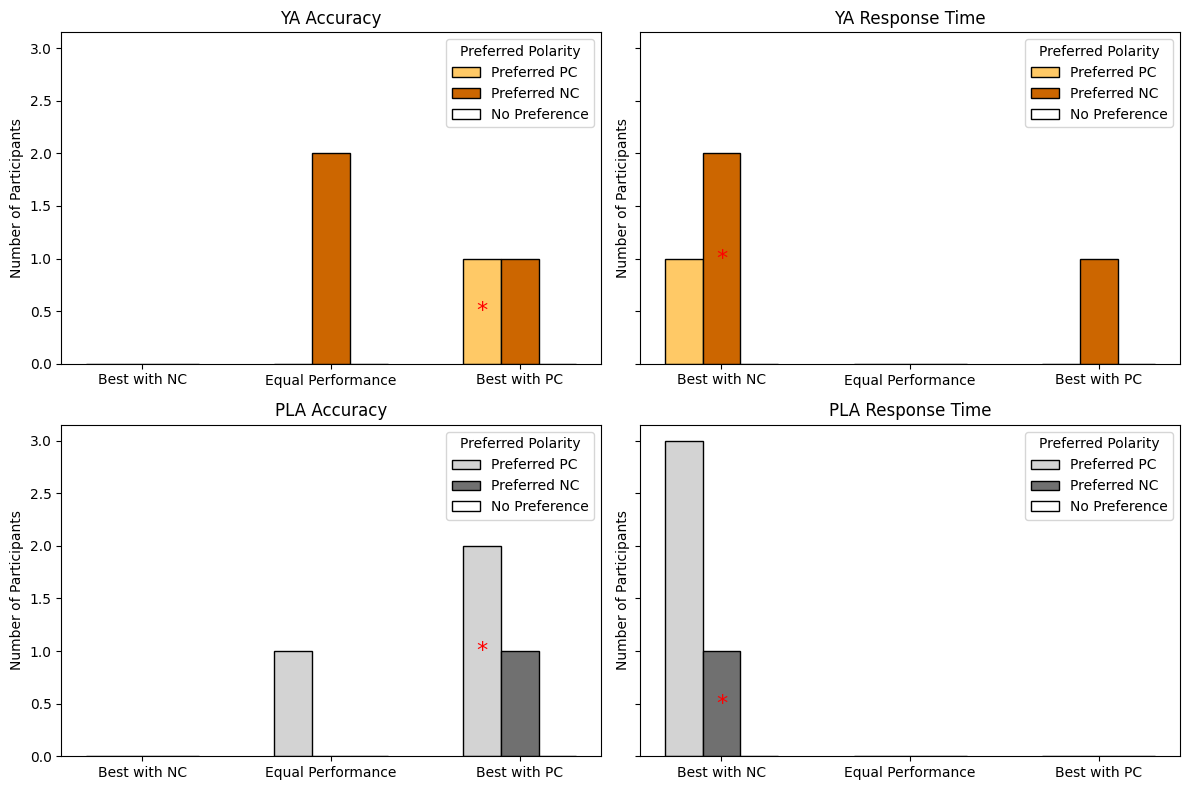

In [40]:
#### BEST VS PREFERRED POLARITY CHART

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 1. Load preferences
BASE = '/content/drive/My Drive/files_for_project'
prefs = pd.read_csv(f'{BASE}/participant.csv')  # adjust if named differently
prefs = prefs.rename(columns={'ID':'participant', 'Pref':'Contrast Preference'})
prefs['pref_pol'] = prefs['Contrast Preference'].map({
    'Light': 'Positive',
    'Dark':  'Negative',
    'None':  'None'
})

# 2. Compute best-performing polarity per participant
better = []
for pid in prefs['participant']:
    # Accuracy
    acc_l = df[(df.participant==pid)&(df.polarity=='positive')]['accuracy'].mean()
    acc_d = df[(df.participant==pid)&(df.polarity=='negative')]['accuracy'].mean()
    if abs(acc_l - acc_d) < 1e-6:
        best_acc = 'None'
    else:
        best_acc = 'Positive' if acc_l > acc_d else 'Negative'
    # Response Time (lower is better)
    rt_l  = df[(df.participant==pid)&(df.polarity=='positive')]['rt_s'].mean()
    rt_d  = df[(df.participant==pid)&(df.polarity=='negative')]['rt_s'].mean()
    if abs(rt_l - rt_d) < 1e-6:
        best_rt = 'None'
    else:
        best_rt = 'Positive' if rt_l < rt_d else 'Negative'
    age = 'YA' if pid <= 4 else 'PLA'
    better.append((pid, age, best_acc, best_rt))

best_df = pd.DataFrame(better, columns=['participant','age_group','best_acc','best_rt'])

# 3. Merge preferences
df5 = best_df.merge(prefs[['participant','pref_pol']], on='participant')

# 4. Build count matrices
def count_matrix(df, age_group, metric):
    sub = df[df.age_group==age_group]
    idx = ['Negative','None','Positive']  # best categories
    cols = ['Positive','Negative','None'] # pref categories
    counts = pd.DataFrame(0, index=idx, columns=cols)
    for _, r in sub.iterrows():
        counts.at[r[metric], r['pref_pol']] += 1
    return counts

ya_acc  = count_matrix(df5, 'YA',  'best_acc')
pla_acc = count_matrix(df5, 'PLA', 'best_acc')
ya_rt   = count_matrix(df5, 'YA',  'best_rt')
pla_rt  = count_matrix(df5, 'PLA', 'best_rt')

# 5. Plot grouped bars
best_order  = ['Negative','None','Positive']
best_labels = ['Best with NC','Equal Performance','Best with PC']
pref_order  = ['Positive','Negative','None']
pref_labels = ['Preferred PC','Preferred NC','No Preference']

ya_cols  = {'Positive':'#FFC966','Negative':'#CC6600','None':'white'}
pla_cols = {'Positive':'#D3D3D3','Negative':'#707070','None':'white'}

fig, axes = plt.subplots(2,2, figsize=(12,8), sharey=True)

def plot_grouped(ax, counts, cols, title):
    x = np.arange(len(best_order))
    width = 0.2
    bottom = np.zeros(len(best_order))
    for i, pref in enumerate(pref_order):
        vals = counts[pref].reindex(best_order).values
        ax.bar(x + (i-1)*width, vals, width,
               color=cols[pref], edgecolor='black', label=pref_labels[i])
        # annotate matches
        match = counts.at[pref, pref]
        if match > 0:
            idx = best_order.index(pref)
            ax.text(idx + (i-1)*width, vals[idx]/2,
                    '*', ha='center', va='center', color='red', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(best_labels)
    ax.set_title(title)
    ax.set_ylabel('Number of Participants')

# Panels
plot_grouped(axes[0,0], ya_acc,  ya_cols,  'YA Accuracy')
plot_grouped(axes[1,0], pla_acc, pla_cols, 'PLA Accuracy')
plot_grouped(axes[0,1], ya_rt,   ya_cols,  'YA Response Time')
plot_grouped(axes[1,1], pla_rt,  pla_cols, 'PLA Response Time')

# 6. Add legend to all subplots (or just one if preferred)
for ax in axes.flatten():
    ax.legend(title='Preferred Polarity', loc='upper right')

plt.tight_layout()
plt.show()


